### 일표본 T-검정(One Sample t-test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB
None

=====

1. 샤피로 검정(정규성 검정)
첫번째값(검정통계치) :  0.9518786668777466
두 번째값(p-value) :  6.730228778906167e-05

=====

2. 윌콕슨 부호 순위 검정(t-검정)
첫번째값(검정통계치) :  3573.0
두 번째값(p-value) :  0.02524520294814093


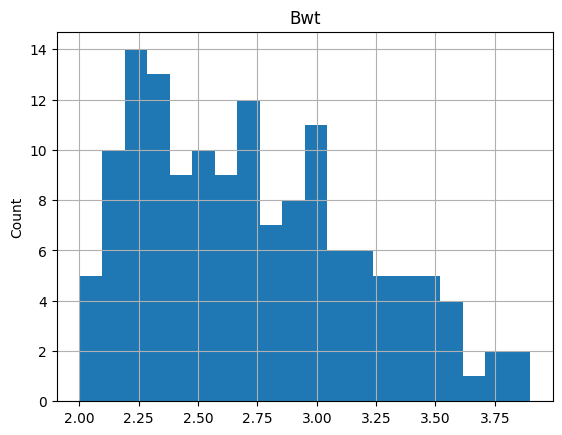

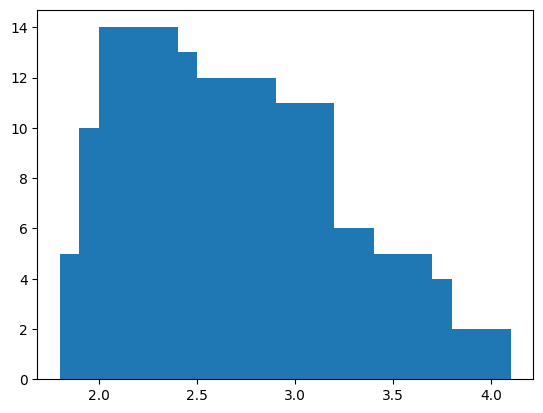

In [30]:
# 고양이 데이터로 확인해보기
# cats 데이터에서 고양이들의 평균 모무게가 2.6kg인지 아닌지에 대한 통계적 검정
    # (양측검정, 유의수준 0.05)

import pandas as pd

cats = pd.read_csv('./data/cats.csv')

# Bwt : 고양이의 몸무게, Hwt : 고양이의 길이
print(cats.info())
print('\n=====\n')

# Shapiro test(정규성 검정)
# scipy.stats.shapiro(x)
# 귀무가설(H0) : 정규성을 가진다.
    # 즉, 데이터가 정규분포를 따른다.
# 대립가설(H1) : 정규성을 가지지 않는다.
    # 즉, 데이터가 정규분포를 따르지 않는다.
import scipy.stats as stats
from scipy.stats import shapiro
mu = 2.6
print('1. 샤피로 검정(정규성 검정)')
print('첫번째값(검정통계치) : ', shapiro(cats['Bwt'])[0])
print('두 번째값(p-value) : ', shapiro(cats['Bwt'])[1])
print('\n=====\n')

# p-value가 유의수준보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다.
    # 즉, cats['Bwt'] 데이터는 정규분포를 따르지 않는다.
    # 따라서 wilcoxon test로 t-test를 진행한다.
    # 만약 정규분포를 따른다면 stats.ttest_1samp(cats.Bwt, popmean = mu)를 사용하면 된다.
print('2. 윌콕슨 부호 순위 검정(t-검정)')
print('첫번째값(검정통계치) : ', stats.wilcoxon(cats.Bwt - mu, alternative = 'two-sided')[0])
print('두 번째값(p-value) : ', stats.wilcoxon(cats.Bwt - mu, alternative = 'two-sided')[1])

# p-value가 유의수준보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.
    # 즉, 유의수준 0.05 하에 고양이의 평균 몸무게는 2.6kg라고 할 수 없다.
# 시각화로 분포 확인해보기
import matplotlib.pyplot as plt
cats['Bwt'].hist(bins = 20)
plt.ylabel('Count')
plt.title('Bwt')
plt.show()

# 히스토그램을 봐도 정규성을 띄지 않음을 알 수 있다.

---

### 대응표본 T-검정(Paired Sample t-test)

In [39]:
# 10명의 환자 대상 수면영양제 복용 전과 후의 수면시간에 대하여 영양제가 효과가 있는지 판단해보기
# 유의수준 = 0.05

import pandas as pd
data = pd.DataFrame({'before' : [7, 3, 4, 5, 2, 1, 6, 6, 5, 4],
                     'after' : [8, 4, 5, 6, 2, 3, 6, 8, 6, 5]})

print(data)

# 정규성 확인
# 귀무가설(H0) : 정규성을 가진다.
    # 즉, 데이터가 정규분포를 따른다.
# 대립가설(H1) : 정규성을 가지지 않는다.
    # 즉, 데이터가 정규분포를 따르지 않는다.
import scipy.stats as stats
from scipy.stats import shapiro
print('1 - (1). before에 대한 샤피로 검정(정규성 검정)')
print('첫번째값(검정통계치) : ', shapiro(data['before'])[0])
print('두 번째값(p-value) : ', shapiro(data['before'])[1])
print('1 - (2). after에 대한 샤피로 검정(정규성 검정)')
print('첫번째값(검정통계치) : ', shapiro(data['after'])[0])
print('두 번째값(p-value) : ', shapiro(data['after'])[1])
print('\n=====\n')

# p-value가 유의수준보다 크므로 귀무가설을 채택한다.
    # 즉, before와 after 두 데이터는 모두 정규성을 갖는다.
    # 이에 따라 ttest 진행
print('2. t-검정')
print('첫번째값(검정통계치) : ', stats.ttest_rel(data['after'], data['before'], alternative = 'greater')[0])
print('두 번째값(p-value) : ', stats.ttest_rel(data['after'], data['before'], alternative = 'greater')[1])

# p-value가 유의수준보다 작으므로 '수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하다.'고 해석할 수 있다.
    # 또한, alternative를 greater로 설정했기 때문에 '영양제를 복용한 후 수면시간이 늘었다.'는 결론을 낼 수 있다.

   before  after
0       7      8
1       3      4
2       4      5
3       5      6
4       2      2
5       1      3
6       6      6
7       6      8
8       5      6
9       4      5
1 - (1). before에 대한 샤피로 검정(정규성 검정)
첫번째값(검정통계치) :  0.9644591808319092
두 번째값(p-value) :  0.835266649723053
1 - (2). after에 대한 샤피로 검정(정규성 검정)
첫번째값(검정통계치) :  0.945683479309082
두 번째값(p-value) :  0.6177965998649597

=====

2. t-검정
첫번째값(검정통계치) :  4.743416490252569
두 번째값(p-value) :  0.0005269356285082764


---

### 독립표본 t-test(Independent Sample t-test)

(47,) (97,) float64 float64
등분산성 검정
첫번째값(검정통계치) :  19.43101190877999
두 번째값(p-value) :  2.0435285255189404e-05

=====

t-검정
첫번째값(검정통계치) :  -8.70948849909559
두 번째값(p-value) :  8.831034455859356e-15

=====

2.359574468085107 2.8999999999999995


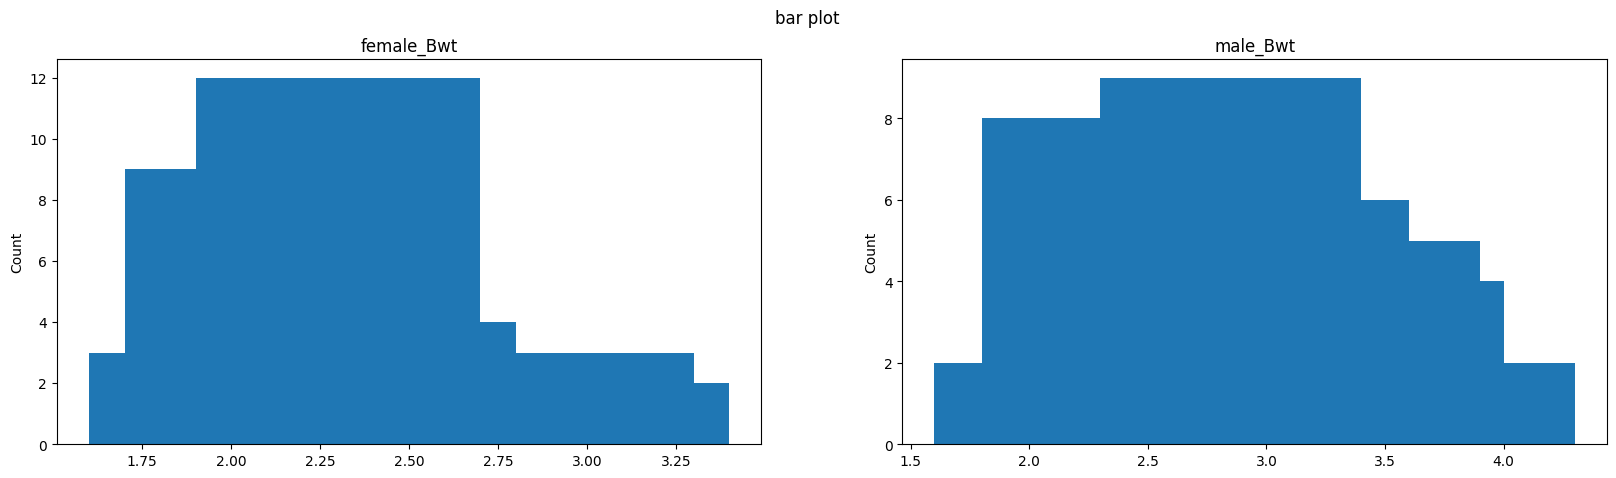

In [89]:
# 고양이 데이터로 수컷과 암컷 고양이의 몸무게 차이가 있는지 검정해보기
# 일표본 검정에서 정규성을 띄지 않는 것을 확인했지만, 정규성을 띈다고 가정하자.
# 즉, 등분산성 검정을 해보자.
    # 등분산성 검정에 들어가는 값은 Series 값으로 데이터의 길이가 같아야 한다.
import pandas as pd

cats = pd.read_csv('./data/cats.csv')

female = cats[cats['Sex'] == 'F']['Bwt']
female = female.astype('float64')
male = cats[cats['Sex'] == 'M']['Bwt']
male = male.astype('float64')
print(female.shape, male.shape, female.dtype, male.dtype)
# 여기서 살짝 걸리긴 한다. 데이터의 길이가 같지 않기 때문이다.
# # 샘플링을 한 번 해볼까한다. -> 다음에
# # SMOTE를 이용한 오버샘플링
# !pip install imbalanced-learn
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# import numpy as np
#
# smote_sample = SMOTE(sampling_strategy = 'minority')
# male_sm, female_sm = smote_sample.fit_resample(male, female)


# 등분산성 검정
# 귀무가설(H0) : 등분산성을 만족시킨다.
    # 즉, 두 집단간의 분산이 같다.
# 대립가설(H1) : 등분산성을 만족시키지 않는다.
    # 즉, 두 집단간의 분산이 같지 않다.
import scipy.stats as stats
stats.levene(female, male)
print('등분산성 검정')
print('첫번째값(검정통계치) : ', stats.levene(female, male)[0])
print('두 번째값(p-value) : ', stats.levene(female, male)[1])
print('\n=====\n')

# p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.
    # 즉, 수컷 데이터와 암컷 데이터는 분산이 다르다.
    # 따라서 equal_var = False로 독립 t-test 진행하기
print('t-검정')
print('첫번째값(검정통계치) : ', stats.ttest_ind(female, male, equal_var = False)[0])
print('두 번째값(p-value) : ', stats.ttest_ind(female, male, equal_var = False)[1])
print('\n=====\n')

# p-value가 유의수준보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.
    # 즉, '수컷과 암컷 고양이의 몸무게 차이는 유의수준 0.05 하에서 통계적으로 유의하다.'라고 해석할 수 있다.
print(female.mean(), male.mean())

# 시각화해보기
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle('bar plot')

female_Bwt_count = pd.value_counts(female.values, sort = False)
male_Bwt_count = pd.value_counts(male.values, sort = False)
axs[0].bar(female_Bwt_count.index, female_Bwt_count.values)
axs[1].bar(male_Bwt_count.index, male_Bwt_count.values)
axs[0].set_title('female_Bwt')
axs[1].set_title('male_Bwt')
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
plt.show()